

<p align="center">
  <img src="TEC.PNG" alt="Logo del Tec" width="500">
</p>



<div align="center">

<h3>Instituto Tecnológico de Estudios Superiores de Monterrey CCM</h3>

<p><strong>Análisis de Ciencia de Datos</strong><br>
Grupo 242</p>

<h3><strong>Reto</strong></h3>
<h3>Primer avance<h3>

<p>Chiara Bombardieri Balanzá - A01659462<br>
Gerardo Javier López García - A016600262<br>
Axel Palacios Granados - A01666972 <br>
Cristian Cruz Orozco - A01665590 <br>
Alejandro Martínez Ochoa - A01657661</p>

<p>Febrero - Junio 2025</p>

</div>


## Introducción 
El presente trabajo tiene como finalidad desarrollar un análisis detallado de la base de datos proporcionada por el socio formador. Este análisis se estructuró dividiendo la información en distintos campos clave, con el objetivo de facilitar la comprensión de los datos y extraer conclusiones significativas. Posteriormente, se integraron los hallazgos en un resumen general que permite observar el comportamiento global de las cuentas y partidas presupuestarias.

Adicionalmente, se plantea una hipótesis basada en los datos de los primeros tres a cuatro meses del año fiscal. Esta consiste en desarrollar un modelo de machine learning capaz de pronosticar el comportamiento de los gastos a lo largo del año, y detectar si existe la posibilidad de que se supere el presupuesto asignado. Este tipo de herramienta predictiva puede resultar clave para una toma de decisiones más informada y una gestión financiera más eficiente.

Cabe destacar que, en este primer avance, únicamente se presenta la hipótesis y su planteamiento general. Su desarrollo completo, así como la validación del modelo propuesto, se llevará a cabo en entregas posteriores del proyecto.

# Desarrollo del primer avance 
Como se mencionó al inicio, para este proyecto se trabajó con todas las hojas de Excel que nos proporcionó el socio formador. El primer paso fue limpiar los datos de cada una de esas hojas, ya que muchas contenían información repetida, celdas vacías o datos que no eran necesarios para el análisis. Una vez que los datos estuvieron limpios, se dividió la información en varios DataFrames para poder trabajar cada parte por separado y analizarla de manera más ordenada. Todo este proceso fue importante para poder llegar a las gráficas que se mostrarán más adelante.

# Data

En esta sección del análisis se trabaja con información importante relacionada con el funcionamiento interno del negocio. Específicamente, se incluyen los datos de los distintos procesos que se llevan a cabo, como operaciones financieras con externos. Se analiza información sobre los proveedores que forman parte del ecosistema del negocio. Esto incluye quiénes son, con qué frecuencia participan, y qué tipo de servicios o productos ofrecen. De igual forma, se toma en cuenta a otras personas involucradas, como colaboradores externos o responsables de ciertas áreas.

Para organizar mejor todos estos datos, se crearon varios DataFrames. Esto nos permite observar los datos de forma más clara y trabajar con ellos de manera más eficiente.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")
import numpy as np

In [8]:
#Lectura de la base de datos
DF=pd.read_excel("BASE.xlsx", sheet_name="Data")
DF

,CONTROL,# CHEQUE,PARTIDA PRESUPUESTAL,UIDD/FOLIO FISCAL,DIRECCION,REGIMEN FISCAL,NOMBRE REGIMEN FISCAL,RFC,STATUS,FECHA DE RECIBIDO,...,Valida,MES,Column1,SUBTOTAL2,IVA3,RET IVA4,RET ISR.1,TOTAL.1,CAMBIOS,Unnamed: 36
0,NaN,NaN,Income (Funding),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Balance,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Income (Funding) IVA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Balance,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F1.2,NaN,Income (Funding),NaN,NaN,Estados Unidos (los),Estados Unidos (los),0.0,NaN,NaN,...,Balance,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N001,0001,7007-009,0.0,86127,Régimen Simplificado de Confianza,Régimen Simplificado de Confianza,1.0,NaN,33.0,...,7007-009,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-45135.0
4,N003,0004,1107-009,1.0,4318,Régimen Simplificado de Confianza,Régimen Simplificado de Confianza,2.0,NaN,40.0,...,1107-009,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-45128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Balance,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Balance,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Balance,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Balance,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
DF[DF["PARTIDA PRESUPUESTAL"] == "1104-003"]  # Verificamos que los datos sean congruentes con la base de datos original.

,CONTROL,# CHEQUE,PARTIDA PRESUPUESTAL,UIDD/FOLIO FISCAL,DIRECCION,REGIMEN FISCAL,NOMBRE REGIMEN FISCAL,RFC,STATUS,FECHA DE RECIBIDO,...,Valida,MES,Column1,SUBTOTAL2,IVA3,RET IVA4,RET ISR.1,TOTAL.1,CAMBIOS,Unnamed: 36
36,N021,0031,1104-003,22.0,1729,Personas Físicas con Actividades Empresariales...,Personas Físicas con Actividades Empresariales...,9.0,NaN,97.0,...,1104-003,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-45071.0
81,N051,64,1104-003,56.0,NaN,Personas Físicas con Actividades Empresariales...,Personas Físicas con Actividades Empresariales...,9.0,NaN,NaN,...,1104-003,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_Data =DF[["SUBTOTAL", "PARTIDA PRESUPUESTAL"]].copy()  # Seleccion de las columnas que se utilizaran mas adelante. 
df_Data

,SUBTOTAL,PARTIDA PRESUPUESTAL
0,7000000.0,Income (Funding)
1,1120000.0,Income (Funding) IVA
2,700000.0,Income (Funding)
3,14182.0,7007-009
4,110000.0,1107-009
...,...,...
7881,NaN,NaN
7882,NaN,NaN
7883,NaN,NaN
7884,NaN,NaN


# Budget

En la siguiente sección se muestran los presupuestos asignados a las diferentes cuentas que aparecen en los datos. A partir de esta información, se crearon gráficas que ayudan a visualizar en qué cuentas se está invirtiendo más dinero y en cuáles menos. Esto permite tener una mejor idea de cómo se distribuye el presupuesto dentro del negocio.

In [17]:
budget = pd.read_excel("BASE.xlsx",sheet_name="Budget")
budget

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,TIPO,REF,Etapa,Sección,ACCT,NaN,BUDGET,NaN,ALL,NaN,Costo
1,Above the Line,Cuenta General,NaN,NaN,1100,NaN,10065000,NaN,DEVELOPMENT,NaN,Balance
2,Above the Line,Sub cuenta,NaN,NaN,1101,NaN,8340000,NaN,ALL SHOW,NaN,Petty Cash
3,Above the Line,Detalle,NaN,NaN,1101-002,NaN,0,NaN,SOFT,NaN,NaN
4,Above the Line,Detalle,NaN,NaN,1101-004,NaN,0,NaN,PREP,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2474,Others,Detalle,NaN,NaN,7230-001,NaN,0,NaN,NaN,NaN,NaN
2475,Others,Detalle,NaN,NaN,7230-002,NaN,0,NaN,NaN,NaN,NaN
2476,Others,Detalle,NaN,NaN,7230-003,NaN,0,NaN,NaN,NaN,NaN
2477,Others,Detalle,NaN,NaN,7230-004,NaN,0,NaN,NaN,NaN,NaN


In [21]:
#Eliminar filas inecesarias.
budget = pd.read_excel('BASE.xlsx', sheet_name='Budget', header=None)
budget.columns = budget.iloc[1]  
budget = budget.drop([0, 1])  
budget.head()

1,TIPO,REF,Etapa,Sección,ACCT,NaN,BUDGET,NaN,ALL,NaN,Costo
2,Above the Line,Cuenta General,NaN,NaN,1100,NaN,10065000,NaN,DEVELOPMENT,NaN,Balance
3,Above the Line,Sub cuenta,NaN,NaN,1101,NaN,8340000,NaN,ALL SHOW,NaN,Petty Cash
4,Above the Line,Detalle,NaN,NaN,1101-002,NaN,0,NaN,SOFT,NaN,NaN
5,Above the Line,Detalle,NaN,NaN,1101-004,NaN,0,NaN,PREP,NaN,NaN
6,Above the Line,Detalle,DEVELOPMENT,NaN,1101-005,NaN,1400000,NaN,SHOOT,NaN,NaN


In [23]:
#Este es importante para el analisis EDA, pero no será presentado al socio formador, ya que no muestra información relevante. 
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 2 to 2479
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TIPO     2478 non-null   object 
 1   REF      2478 non-null   object 
 2   Etapa    1563 non-null   object 
 3   Sección  0 non-null      object 
 4   ACCT     2478 non-null   object 
 5   nan      0 non-null      float64
 6   BUDGET   2455 non-null   object 
 7   nan      20 non-null     float64
 8   ALL      34 non-null     object 
 9   nan      0 non-null      float64
 10  Costo    2 non-null      object 
dtypes: float64(3), object(8)
memory usage: 213.1+ KB


In [25]:
cuentas_generales = budget[budget["REF"] == "Cuenta General"]
presupuestos_por_cuenta = cuentas_generales.groupby("ACCT")["BUDGET"].sum().sort_values(ascending=False)
presupuestos_por_cuenta

ACCT
3400       15001515
7000       13503510
1400    11960556.03
3100       11484172
1100       10065000
1200        9449620
3600        7591103
2000        6668300
3900     5965292.85
2400        5268025
5000        4891351
6000        3833200
2700        2972500
1300     2810543.88
5100        2206500
5200        1843600
2200        1825740
3000        1624362
2100        1614000
7200        1485676
6100        1452334
4100        1451938
2300        1427550
1600     1416166.53
2800        1208200
3200        1139000
2600        1115250
2500        1009000
3700         810000
3800         747019
2900         630387
3500         281000
3300         165500
5400         100000
5300          80000
Name: BUDGET, dtype: object

In [27]:
columnas_nan = [col for col in budget.columns if pd.isna(col)]
columnas_a_eliminar = ["Sección", "ALL", "Costo"] + columnas_nan
budget = budget.drop(columns=columnas_a_eliminar, errors="ignore")
budget

1,TIPO,REF,Etapa,ACCT,BUDGET
2,Above the Line,Cuenta General,NaN,1100,10065000
3,Above the Line,Sub cuenta,NaN,1101,8340000
4,Above the Line,Detalle,NaN,1101-002,0
5,Above the Line,Detalle,NaN,1101-004,0
6,Above the Line,Detalle,DEVELOPMENT,1101-005,1400000
...,...,...,...,...,...
2475,Others,Detalle,NaN,7230-001,0
2476,Others,Detalle,NaN,7230-002,0
2477,Others,Detalle,NaN,7230-003,0
2478,Others,Detalle,NaN,7230-004,0


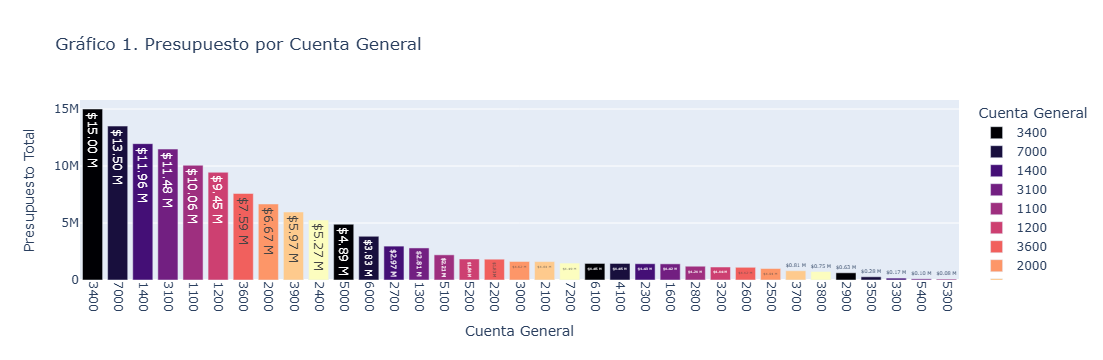

In [115]:
budget_grafico_1 = presupuestos_por_cuenta.reset_index()
budget_grafico_1.columns = ["Cuenta General", "Presupuesto"]


budget_grafico_1["Presupuesto_M_text"] = budget_grafico_1["Presupuesto"].apply(lambda x: f"{x/1_000_000:.2f}")

fig = px.bar(
    budget_grafico_1,
    x="Cuenta General",
    y="Presupuesto",
    title="Gráfico 1. Presupuesto por Cuenta General",
    labels={"Cuenta General": "Cuenta General", "Presupuesto": "Presupuesto Total"},
    text="Presupuesto_M_text",
    color="Cuenta General",
    color_discrete_sequence=px.colors.sequential.Magma
)

fig.update_traces(texttemplate="$%{text} M")
fig.update_layout(xaxis_tickangle=90)
fig.show()



<h3 style="text-align: center;">En la gráfica 1 se ordenan las cuentas generales de mayor a menor dependiendo del presupuesto que se les otorga.</h3>


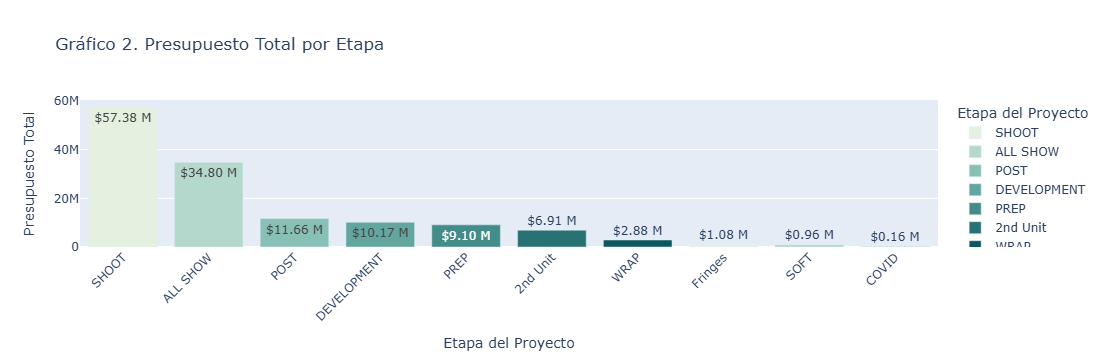

In [113]:
etapas = budget[budget["Etapa"].notna()]
presupuesto_etapas = etapas.groupby("Etapa")["BUDGET"].sum().sort_values(ascending=False)
df_etapas = presupuesto_etapas.reset_index()
df_etapas.columns = ["Etapa", "Presupuesto"]


df_etapas["Presupuesto_M_text"] = df_etapas["Presupuesto"].apply(lambda x: f"{x/1_000_000:.2f}")

fig = px.bar(
    df_etapas,
    x="Etapa",
    y="Presupuesto",
    title="Gráfico 2. Presupuesto Total por Etapa",
    labels={"Etapa": "Etapa del Proyecto", "Presupuesto": "Presupuesto Total"},
    text="Presupuesto_M_text",
    color="Etapa",
    color_discrete_sequence=px.colors.sequential.Mint
)

fig.update_traces(texttemplate="$%{text} M")
fig.update_layout(xaxis_tickangle=-45)
fig.show()


<h3 style="text-align: center;">En la gráfica 2 se despliega el presupuesto que se otorga a las diversas etapas del proyecto y se ordena de mayor a menor. </h3>

In [35]:
#Despliegue de las sub cuentas con mayor presupuesto. 
budget["REF"] = budget["REF"].astype(str).str.strip()
subcuentas = budget[budget["REF"] == "Sub cuenta"]

if subcuentas.empty:
    print("No se encontraron subcuentas con ese nombre exacto.")
else:
    top_subcuentas = subcuentas.groupby("ACCT")["BUDGET"].sum().sort_values(ascending=False).head(10)
    print("Top 10 subcuentas con mayor presupuesto:")
    print(top_subcuentas)

Top 10 subcuentas con mayor presupuesto:
ACCT
7003    11643574
1101     8340000
1401     7612289
3193     7120297
3412     6880105
1201     5979120
3683     5456700
3410     4701050
3902     4360556
2494     3001630
Name: BUDGET, dtype: object


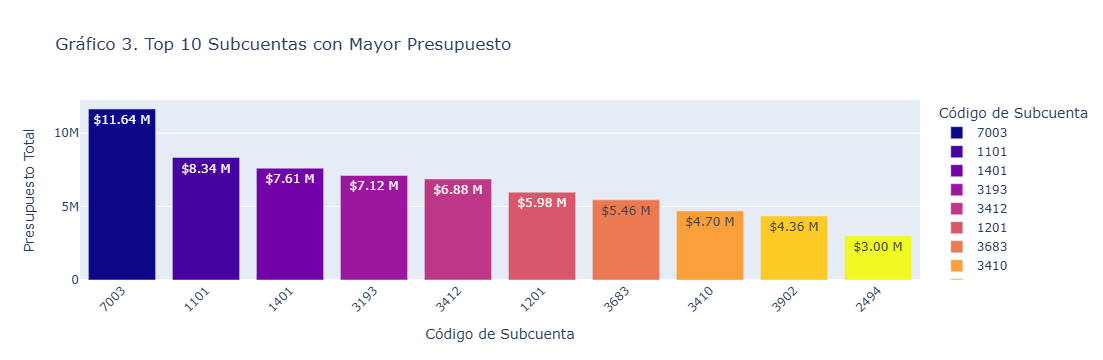

In [117]:
if not subcuentas.empty:
    top_subcuentas = subcuentas.groupby("ACCT")["BUDGET"].sum().sort_values(ascending=False).head(10)
    df_top = top_subcuentas.reset_index()
    df_top.columns = ["Subcuenta", "Presupuesto"]

    df_top["Presupuesto_M_text"] = df_top["Presupuesto"].apply(lambda x: f"{x/1_000_000:.2f}")

    fig = px.bar(
        df_top,
        x="Subcuenta",
        y="Presupuesto",
        title=" Gráfico 3. Top 10 Subcuentas con Mayor Presupuesto",
        labels={"Subcuenta": "Código de Subcuenta", "Presupuesto": "Presupuesto Total"},
        text="Presupuesto_M_text",
        color="Subcuenta",
        color_discrete_sequence=px.colors.sequential.Plasma
    )

    fig.update_traces(texttemplate="$%{text} M")
    fig.update_layout(xaxis_tickangle=-45)
    fig.show()
else:
    print("No se encontraron subcuentas con ese nombre exacto.")



<h3 style="text-align: center;">En la gráfica 3 se despliegan las 10 subcuentas que cuentas con un mayor presupuesto. </h3>

# Cost - Report

En esta última sección se presenta un reporte de costos que analiza la relación entre los costos reales y los presupuestos asignados, así como su conexión con las diferentes cuentas que se manejan. Este análisis es clave para entender cómo se están utilizando los recursos y qué tan alineados están los gastos con lo planeado. Además, esta información será fundamental para poder aplicar y poner a prueba la hipótesis planteada en la siguiente entrega del proyecto.

In [41]:
df_data = df_Data.rename(columns={"PARTIDA PRESUPUESTAL": "ACCT"})
df_data

,SUBTOTAL,ACCT
0,7000000.0,Income (Funding)
1,1120000.0,Income (Funding) IVA
2,700000.0,Income (Funding)
3,14182.0,7007-009
4,110000.0,1107-009
...,...,...
7881,NaN,NaN
7882,NaN,NaN
7883,NaN,NaN
7884,NaN,NaN


In [43]:
pd.set_option('display.float_format', '{:,.2f}'.format)
# Agrupa el DataFrame por la columna "ACCT" y suma los valores de SUBTOTAL por cuenta.
df_data = df_data.groupby("ACCT", as_index=False)[["SUBTOTAL"]].sum()
df_data

,ACCT,SUBTOTAL
0,1101-005,"1,400,000.00"
1,1101-006,"100,000.03"
2,1101-007,"100,000.00"
3,1101-011,"1,400,000.00"
4,1101-012,"75,000.00"
...,...,...
1053,Income (Funding),"134,862,103.57"
1054,Income (Funding) IVA,"19,352,891.03"
1055,PC El Niñero S01,"241,795.83"
1056,Pago Carolina Rivera,"1,000,000.00"


In [45]:
df_CostReport1=pd.merge(budget,df_data, on="ACCT", how="outer")
df_CostReport2= df_CostReport1.rename(columns = {"SUBTOTAL": "COST TO DATE"})
df_CostReport2

,TIPO,REF,Etapa,ACCT,BUDGET,COST TO DATE
0,Post,Sub cuenta,NaN,5221,0,NaN
1,Others,Sub cuenta,NaN,7230,0,NaN
2,Above the Line,Cuenta General,NaN,1100,10065000,NaN
3,Above the Line,Sub cuenta,NaN,1101,8340000,NaN
4,Above the Line,Detalle,NaN,1101-002,0,NaN
...,...,...,...,...,...,...
2482,NaN,NaN,NaN,Income (Funding),NaN,"134,862,103.57"
2483,NaN,NaN,NaN,Income (Funding) IVA,NaN,"19,352,891.03"
2484,NaN,NaN,NaN,PC El Niñero S01,NaN,"241,795.83"
2485,NaN,NaN,NaN,Pago Carolina Rivera,NaN,"1,000,000.00"


In [47]:
df_CostReport3 = df_CostReport2.groupby("ACCT", as_index=False).agg({
    "TIPO": "first",
    "REF": "first",
    "Etapa": "first",
    "BUDGET": "first",
    "COST TO DATE": "sum"
})
df_CostReport3

,ACCT,TIPO,REF,Etapa,BUDGET,COST TO DATE
0,5221,Post,Sub cuenta,None,0,0.00
1,7230,Others,Sub cuenta,None,0,0.00
2,1100,Above the Line,Cuenta General,None,10065000,0.00
3,1101,Above the Line,Sub cuenta,None,8340000,0.00
4,1101-002,Above the Line,Detalle,None,0,0.00
...,...,...,...,...,...,...
2482,Income (Funding),None,None,None,None,"134,862,103.57"
2483,Income (Funding) IVA,None,None,None,None,"19,352,891.03"
2484,PC El Niñero S01,None,None,None,None,"241,795.83"
2485,Pago Carolina Rivera,None,None,None,None,"1,000,000.00"


In [49]:
df_CostReport3["VARIANCE"] = df_CostReport3["BUDGET"] - df_CostReport3["COST TO DATE"]
df_CostReport4 = df_CostReport3.groupby("ACCT", as_index=False).agg({
    "TIPO": "first",
    "REF": "first",
    "Etapa": "first",
    "BUDGET": "first",
    "COST TO DATE": "sum"
})

# Agregar la columna de diferencia
df_CostReport4["VARIANCE"] = df_CostReport4["BUDGET"] - df_CostReport4["COST TO DATE"]

# Mostrar el resultado
df_CostReport4.head(15)

,ACCT,TIPO,REF,Etapa,BUDGET,COST TO DATE,VARIANCE
0,5221,Post,Sub cuenta,None,0,0.00,0.00
1,7230,Others,Sub cuenta,None,0,0.00,0.00
2,1100,Above the Line,Cuenta General,None,10065000,0.00,"10,065,000.00"
3,1101,Above the Line,Sub cuenta,None,8340000,0.00,"8,340,000.00"
4,1101-002,Above the Line,Detalle,None,0,0.00,0.00
5,1101-004,Above the Line,Detalle,None,0,0.00,0.00
6,1101-005,Above the Line,Detalle,DEVELOPMENT,1400000,"1,400,000.00",0.00
7,1101-006,Above the Line,Detalle,DEVELOPMENT,100000,"100,000.03",-0.03
8,1101-007,Above the Line,Detalle,DEVELOPMENT,100000,"100,000.00",0.00
9,1101-010,Above the Line,Detalle,None,0,0.00,0.00


In [51]:
df_CostReport4["ACCT"] = df_CostReport4["ACCT"].astype(str)
detalle_df = df_CostReport4[df_CostReport4["REF"] == "Detalle"].copy()


sub_df = detalle_df.copy()
sub_df["ACCT"] = sub_df["ACCT"].str[:4]  # Subcuenta: primeros 4 caracteres
sub_sums = sub_df.groupby("ACCT", as_index=False)[["BUDGET", "COST TO DATE"]].sum()
sub_sums["REF"] = "Sub cuenta"
sub_sums["TIPO"] = "Above the Line"


# NOTA: usamos las subcuentas agregadas para hacer el total de cuenta general
gen_df = sub_sums.copy()
gen_df["ACCT"] = gen_df["ACCT"].str[:2] + "00"  
gen_sums = gen_df.groupby("ACCT", as_index=False)[["BUDGET", "COST TO DATE"]].sum()
gen_sums["REF"] = "Cuenta General"
gen_sums["TIPO"] = "Above the Line"


final_cost_report = pd.concat([gen_sums, sub_sums, detalle_df], ignore_index=True)

#Calcular VARIANCE
final_cost_report["VARIANCE"] = final_cost_report["BUDGET"] - final_cost_report["COST TO DATE"]

pd.set_option('display.float_format', '{:,.2f}'.format)
final_cost_report.sort_values(by="ACCT")

,ACCT,BUDGET,COST TO DATE,REF,TIPO,Etapa,VARIANCE
0,1100,10065000,"10,065,000.08",Cuenta General,Above the Line,NaN,-0.08
35,1101,8340000,"8,340,000.02",Sub cuenta,Above the Line,NaN,-0.02
244,1101-002,0,0.00,Detalle,Above the Line,None,0.00
245,1101-004,0,0.00,Detalle,Above the Line,None,0.00
246,1101-005,1400000,"1,400,000.00",Detalle,Above the Line,DEVELOPMENT,0.00
...,...,...,...,...,...,...,...
2473,7230-001,0,"7,050.76",Detalle,Others,None,"-7,050.76"
2474,7230-002,0,"11,436.91",Detalle,Others,None,"-11,436.91"
2475,7230-003,0,"12,178.92",Detalle,Others,None,"-12,178.92"
2476,7230-004,0,"3,025.87",Detalle,Others,None,"-3,025.87"


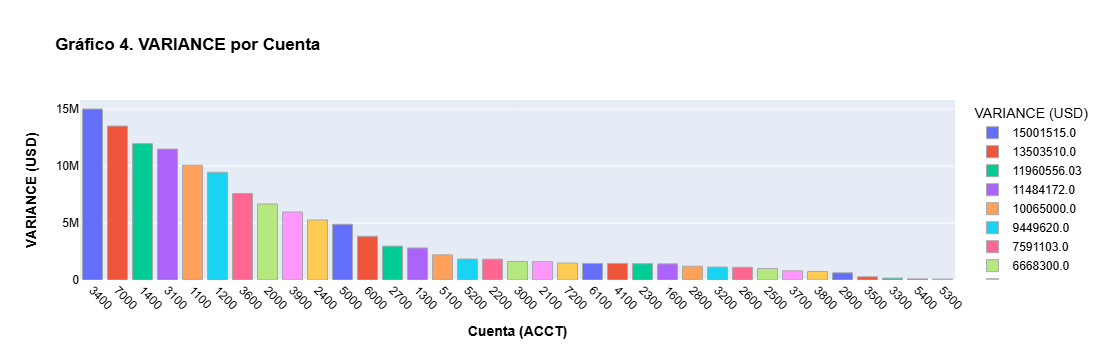

In [143]:
df_plot = df_CostReport4[df_CostReport4['REF'].isin(['Cuenta General'])].copy()

df_plot["VARIANCE_M"] = df_plot["VARIANCE"].apply(lambda x: round(x/1_000_000, 2))
df_plot["COST_TO_DATE_M"] = df_plot["COST TO DATE"].apply(lambda x: round(x/1_000_000, 2))

df_plot = df_plot.sort_values('VARIANCE', ascending=False)

fig = px.bar(df_plot,x='ACCT',y='VARIANCE',color='VARIANCE',color_continuous_scale='thermal', 
    title='<b>Gráfico 4. VARIANCE por Cuenta </b>',
    labels={'VARIANCE': 'VARIANCE (USD)', 'ACCT': 'Cuenta'},
    hover_data={'VARIANCE_M': True, 'COST_TO_DATE_M': True, 'REF': True},
)

fig.update_traces(marker=dict(line=dict(color='darkgray', width=1)),
                  hovertemplate='<b>Cuenta:</b> %{x}<br>'+'<b>VARIANCE:</b> $%{customdata[0]} M<br>'+'<b>COST TO DATE:</b> $%{customdata[1]} M<br>'+'<b>REF:</b> %{customdata[2]}<extra></extra>')
fig.update_layout( font=dict(family='Arial', size=12, color='black'),xaxis=dict(title='<b>Cuenta (ACCT)</b>', tickangle=45), yaxis=dict(title='<b>VARIANCE (USD)</b>'),
                  hoverlabel=dict(bgcolor='white', font_size=12),coloraxis_colorbar=dict(title='VARIANCE'),)
fig.show()


<h3 style="text-align: center;">En la gráfica 4, Se despliega la diferencia entre el presupuesto y el gasto por cuenta. </h3>

# Summary
Por último, en esta sección se desarrolla un pequeño resumen de la información contenida en la base de datos. Este resumen es especialmente importante porque representa la forma en que el negocio presenta sus datos hacia el exterior, especialmente a sus clientes. Por eso, es fundamental que sea claro y fácil de entender. En futuras entregas, trabajaremos en mejorar su diseño para que sea más atractivo y accesible para el público en general.

In [57]:
final_cost_report.replace("nan", np.nan, inplace=True)


for col in ["COST TO DATE", "BUDGET", "VARIANCE"]:
    final_cost_report[col] = pd.to_numeric(final_cost_report[col], errors='coerce')  

total_cost = final_cost_report["COST TO DATE"].sum(skipna=True)
total_budget = final_cost_report["BUDGET"].sum(skipna=True)

total_variance = final_cost_report["VARIANCE"].sum(skipna=True)

cpi = round(total_cost / total_budget, 2) if total_budget != 0 else 0

print("RESUMEN GENERAL")
print(f"→ Costo Total a la Fecha: ${total_cost:,.2f}")
print(f"→ Presupuesto Total: ${total_budget:,.2f}")
print(f"→ Variación Total: ${total_variance:,.2f}")

print(f"→ Índice de Cumplimiento Presupuestal (CPI): {cpi}") 
# mide la eficiencia del uso del presupuesto hasta la fecha. Te dice si estás gastando más, menos o justo lo que deberías.

beneficiadas = final_cost_report.sort_values("VARIANCE", ascending=False).head(5)
print("\n Cuentas Más Beneficiadas:")
print(beneficiadas[["ACCT", "COST TO DATE", "BUDGET", "VARIANCE"]].dropna().to_string(index=False))

impactadas = final_cost_report.sort_values("VARIANCE", ascending=True).head(5)

print("\n Cuentas Más Impactadas:")
print(impactadas[["ACCT", "COST TO DATE", "BUDGET", "VARIANCE"]].dropna().to_string(index=False))

RESUMEN GENERAL
→ Costo Total a la Fecha: $403,115,948.29
→ Presupuesto Total: $405,293,733.00
→ Variación Total: $3,000,835.78
→ Índice de Cumplimiento Presupuestal (CPI): 0.99

 Cuentas Más Beneficiadas:
    ACCT  COST TO DATE        BUDGET     VARIANCE
3412-127      2,155.17  2,701,500.00 2,699,344.83
    3412  4,270,057.83  6,880,105.37 2,610,047.54
    3400 12,724,039.85 15,001,515.11 2,277,475.26
7003-004 10,574,177.83 11,643,573.80 1,069,395.97
    7003 10,574,177.83 11,643,573.80 1,069,395.97

 Cuentas Más Impactadas:
    ACCT  COST TO DATE        BUDGET      VARIANCE
    1400 13,899,922.02 11,960,556.35 -1,939,365.67
    1401  8,807,210.20  7,612,289.00 -1,194,921.20
6137-003          0.00   -849,515.52   -849,515.52
    6137          0.00   -849,515.52   -849,515.52
1499-001  1,649,770.71    818,091.03   -831,679.68


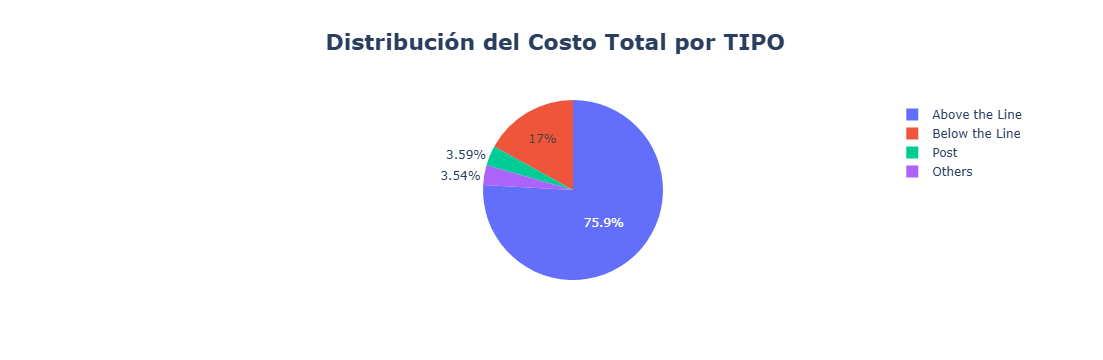

In [59]:
tipo_cost = final_cost_report.groupby('TIPO')['COST TO DATE'].sum().reset_index()

fig = px.pie(tipo_cost, values='COST TO DATE', names='TIPO',title='Gráfico 5. Distribución del Costo Total por TIPO')  

fig.update_layout(title={'text': "<b> Distribución del Costo Total por TIPO</b>", 'x':0.5}, title_font_size=22)

fig.show()

El gráfico 5, muestra cómo se distribuye el costo total entre los diferentes tipos de gasto. Cada segmento representa un tipo, y el tamaño del segmento indica qué porcentaje del gasto total corresponde a ese tipo.

Esta visualización permite detectar con facilidad qué áreas dominan el gasto operativo y abre la puerta a preguntas estratégicas

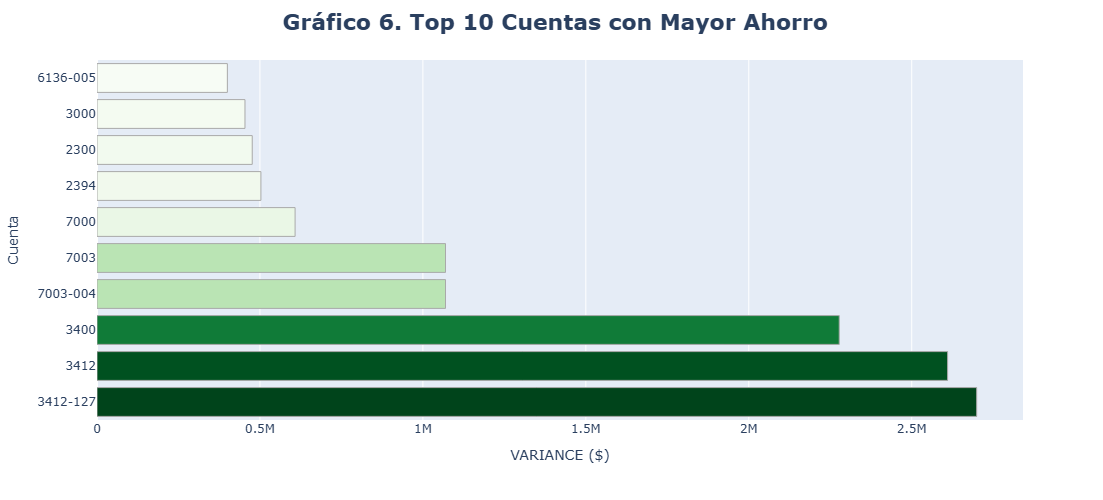

In [162]:
ahorros = final_cost_report.sort_values("VARIANCE", ascending=False).head(10)
ahorros["VARIANCE_M"] = (ahorros["VARIANCE"] / 1_000_000).round(2)
fig = px.bar(ahorros,x="VARIANCE",y="ACCT",labels={"VARIANCE": "VARIANCE ($)", "ACCT": "Cuenta"},color="VARIANCE",color_continuous_scale="greens",height=500,hover_data={"VARIANCE_M": True}
)
fig.update_traces(hovertemplate='<b>Cuenta:</b> %{y}<br>'+'<b>Ahorro:</b> $%{customdata[0]} M<extra></extra>',marker=dict(line=dict(color='darkgray', width=1))
)
fig.update_layout(title={'text': "<b> Gráfico 6. Top 10 Cuentas con Mayor Ahorro</b>", 'x':0.5},title_font_size=22,coloraxis_showscale=False
)
fig.show()


Se muestran las 10 cuentas con mayor ahorro con respecto al presupuesto asignado. El objetivo principal es visualizar cuáles han tenido una ejecución presupuestal más baja, lo que puede indicar una mala gestión de recursos, un subejercicio o incluso una sobreestimación del presupuesto original.

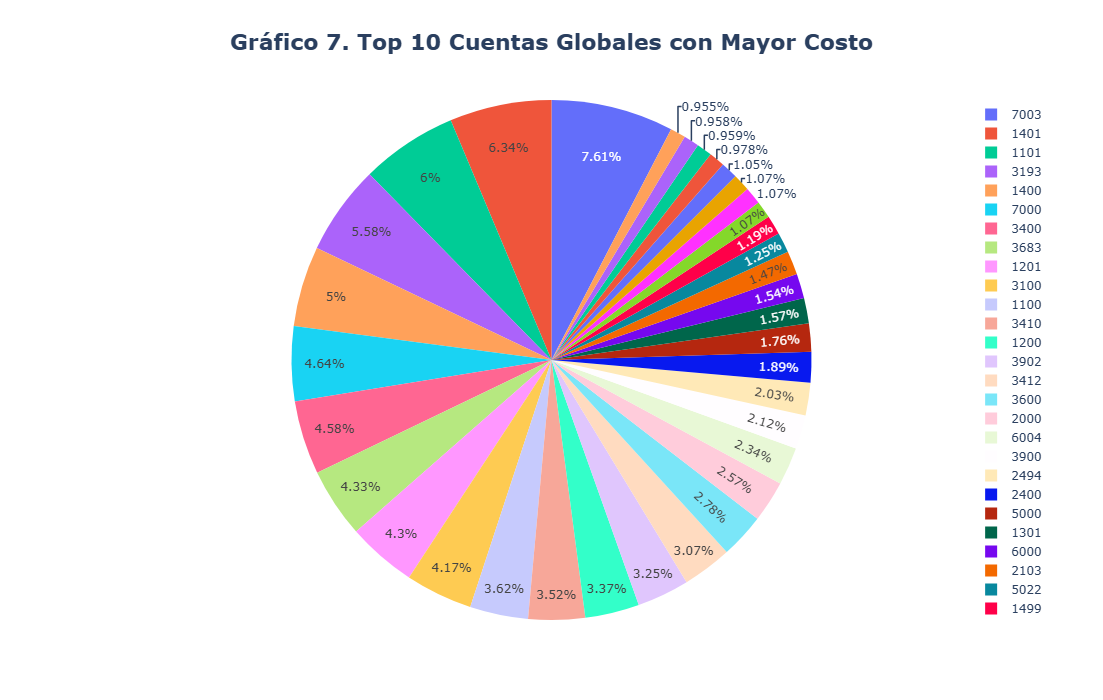

In [152]:
final_cost_report["CUENTA_GLOBAL"] = final_cost_report["ACCT"].astype(str).str.extract(r"^(\d{4})")
df_pie = final_cost_report.groupby("CUENTA_GLOBAL", as_index=False)["COST TO DATE"].sum().sort_values("COST TO DATE", ascending=False).head(35)
df_pie["COST_TO_DATE_M"] = (df_pie["COST TO DATE"] / 1_000_000).round(2)

fig = px.pie(df_pie,names="CUENTA_GLOBAL",values="COST TO DATE",title="<b>Gráfico 7. Top 10 Cuentas Globales con Mayor Costo</b>",hover_data={"COST_TO_DATE_M": True})
fig.update_traces(hovertemplate='<b>Cuenta Global:</b> %{label}<br>'+'<b>Costo Total:</b> $%{customdata[0]} M<extra></extra>')
fig.update_layout(width=1000, height=700, title={'x':0.5}, title_font_size=22)
fig.show()


El gráfico 7 facilita la visualización y comparación del uso del presupuesto entre cuentas globales. Al ser interactiva, permite identificar qué cuentas representan los mayores porcentajes del gasto total.

El usuario puede seleccionar cuentas específicas para analizar su peso relativo dentro del total, lo que resulta útil para detectar concentraciones de recursos, lo que también ayuda a tomar decisiones más informadas sobre la distribución presupuestal y posibles ajustes financieros.

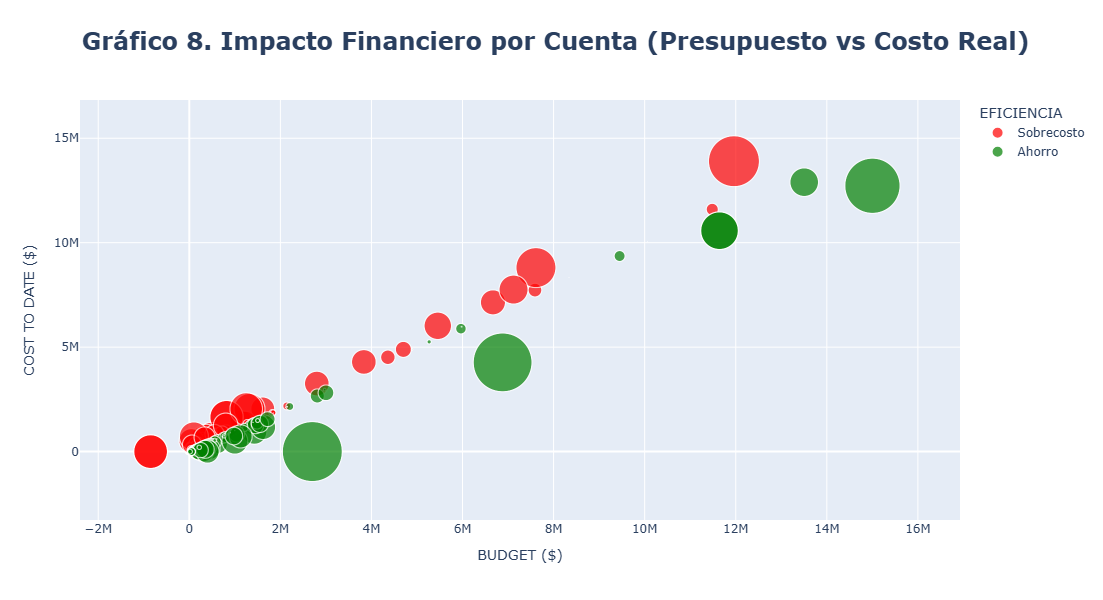

In [73]:
final_cost_report["EFICIENCIA"] = np.where(final_cost_report["VARIANCE"] >= 0, "Ahorro", "Sobrecosto")

df_bubble = final_cost_report.dropna(subset=["BUDGET", "COST TO DATE", "VARIANCE"]).copy()

df_bubble["VARIANCE"] = df_bubble["VARIANCE"].abs() #se toman los valores abs para evitar errores

fig = px.scatter(df_bubble, 
                 x="BUDGET", 
                 y="COST TO DATE", 
                 size="VARIANCE", 
                 color="EFICIENCIA",
                 hover_name="ACCT",
                 color_discrete_map={"Ahorro": "green", "Sobrecosto": "red"},
                 title="<b> Gráfico 8. Impacto Financiero por Cuenta (Presupuesto vs Costo Real)</b>",
                 labels={"BUDGET": "BUDGET ($)", "COST TO DATE": "COST TO DATE ($)"},
                 size_max=60,height=600)

fig.update_layout(title={'x': 0.5}, title_font_size=24)
fig.show()

El gráfico 8, el cual es una gráfica tipo scatterplot permite analizar visualmente la relación entre el presupuesto asignado y el gasto real (Cost to Date) por cuenta. Cada punto representa una cuenta específica, donde el eje X indica el presupuesto y el eje Y muestra el costo real. El tamaño de cada burbuja refleja la magnitud de la variación entre ambos valores, mientras que el color permite identificar rápidamente el tipo de resultado: verde para cuentas con ahorro y rojo para cuentas con sobrecosto. Además, al ser interactiva, permite consultar los detalles de cada cuenta con solo pasar el cursor sobre las burbujas, haciendo de esta herramienta una forma intuitiva y poderosa de explorar la información financiera.

## Conclusiones
A través de este primer análisis, logramos tener un panorama más claro sobre la distribución y el uso de los recursos dentro de la base de datos proporcionada por el socio formador. Limpiar y analizar la información en distintos campos nos permitió detectar patrones y comportamientos importantes en relación con los gastos y presupuestos asignados.

Si bien en este avance solo se planteó la hipótesis de que es posible predecir los gastos futuros a partir de los primeros meses del año, se considera que este enfoque tiene potencial para apoyar la toma de decisiones y mejorar la planeación financiera. Un modelo de machine learning bien construido podría convertirse en una herramienta útil para anticipar sobrecostos y tomar medidas preventivas.

En entregas futuras, se profundizará en el desarrollo del modelo predictivo propuesto, con el fin de evaluar su efectividad y comprobar si realmente puede anticipar el comportamiento del presupuesto a lo largo del año.

## Referencias 


* Facet. (s.f.). Facet Plots in Python. Plotly. Recuperado de https://plotly.com/python/facet-plots/
